# Data Exploration

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import plotly.express as pl

In [24]:
data = pd.read_csv("housing_data.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### total_bedrooms has a few null entries, so it's fine to drop those data points

In [26]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Trying to predict median_house_value so separate the data accordingly

In [27]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)
training_data = x_train.join(y_train)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19183,-122.59,38.44,14.0,1665.0,390.0,505.0,348.0,3.1830,<1H OCEAN,201200.0
9496,-123.70,39.32,18.0,1652.0,352.0,711.0,292.0,3.1071,<1H OCEAN,213200.0
14301,-117.14,32.72,43.0,1073.0,344.0,660.0,279.0,2.0529,NEAR OCEAN,168800.0
2222,-119.83,36.82,14.0,1087.0,165.0,365.0,176.0,7.2909,INLAND,155600.0
17253,-119.71,34.42,49.0,1560.0,436.0,1041.0,411.0,2.9250,<1H OCEAN,246900.0
...,...,...,...,...,...,...,...,...,...,...
6333,-117.95,33.99,25.0,1075.0,138.0,451.0,132.0,6.8492,<1H OCEAN,332200.0
13519,-117.35,34.20,5.0,9269.0,1605.0,4916.0,1519.0,4.4367,INLAND,133200.0
5580,-118.30,33.83,33.0,2716.0,660.0,1807.0,661.0,3.5473,<1H OCEAN,226300.0
340,-122.18,37.75,46.0,941.0,218.0,621.0,195.0,1.3250,NEAR BAY,87100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

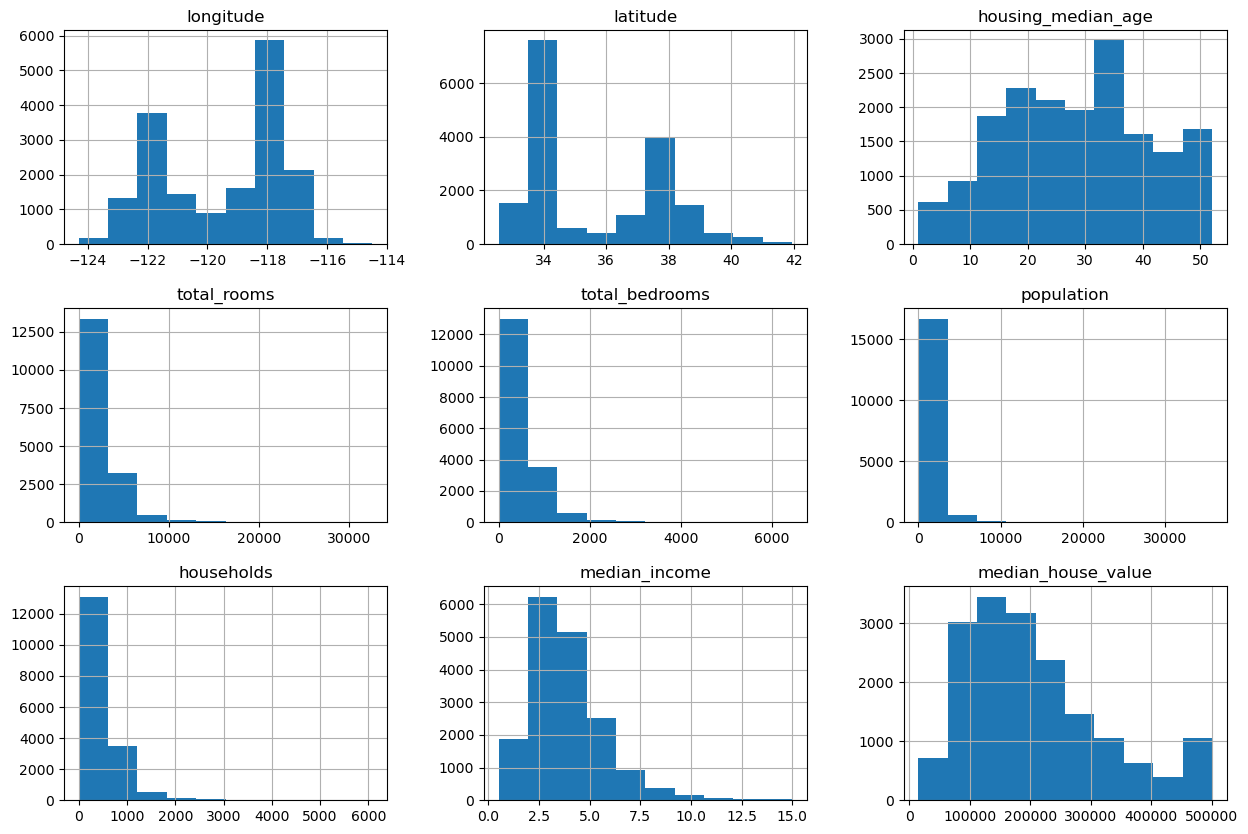

In [29]:
training_data.hist(figsize = (15,10))

In [30]:
correlation = training_data.corr(numeric_only = True)
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925470,-0.106419,0.042747,0.066894,0.095724,0.053298,-0.011440,-0.042748
latitude,-0.925470,1.000000,0.008453,-0.035721,-0.066305,-0.106087,-0.070107,-0.081524,-0.145530
housing_median_age,-0.106419,0.008453,1.000000,-0.364892,-0.321229,-0.295738,-0.302986,-0.118682,0.105302
total_rooms,0.042747,-0.035721,-0.364892,1.000000,0.926921,0.849816,0.916440,0.205994,0.141774
total_bedrooms,0.066894,-0.066305,-0.321229,0.926921,1.000000,0.872440,0.980122,-0.008232,0.053325
population,0.095724,-0.106087,-0.295738,0.849816,0.872440,1.000000,0.901704,0.004642,-0.024336
households,0.053298,-0.070107,-0.302986,0.916440,0.980122,0.901704,1.000000,0.012857,0.067220
median_income,-0.011440,-0.081524,-0.118682,0.205994,-0.008232,0.004642,0.012857,1.000000,0.688317
median_house_value,-0.042748,-0.145530,0.105302,0.141774,0.053325,-0.024336,0.067220,0.688317,1.000000


<Axes: >

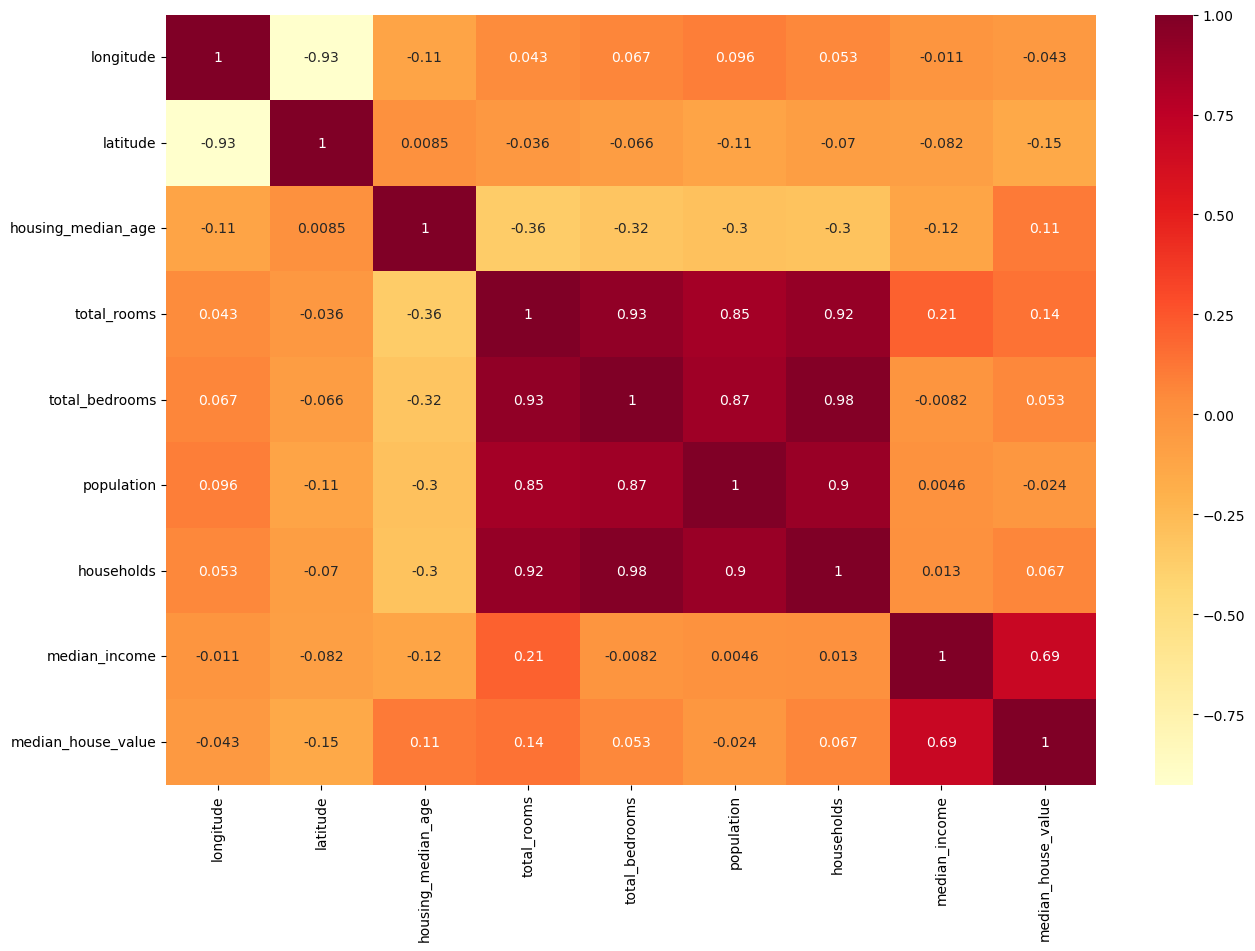

In [31]:
plt.figure(figsize = (15,10))
sea.heatmap(correlation, annot = True, cmap = "YlOrRd")

# Data Preprocessing / Feature Engineering

### Histograms show that total_rooms, total_bedrooms, population, and households have right-skewed shape. Can use log of data to get closer to bell curve shape

In [32]:
log_epsilon = 1e-32
training_data['total_rooms'] = np.log(training_data['total_rooms'] + log_epsilon)
training_data['total_bedrooms'] = np.log(training_data['total_bedrooms'] + log_epsilon)
training_data['population'] = np.log(training_data['population'] + log_epsilon)
training_data['households'] = np.log(training_data['households'] + log_epsilon)

### The histograms for those 4 features now have a shape closer to Gaussian bell curve. Hence, those features likely follow a log-normal distribution

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

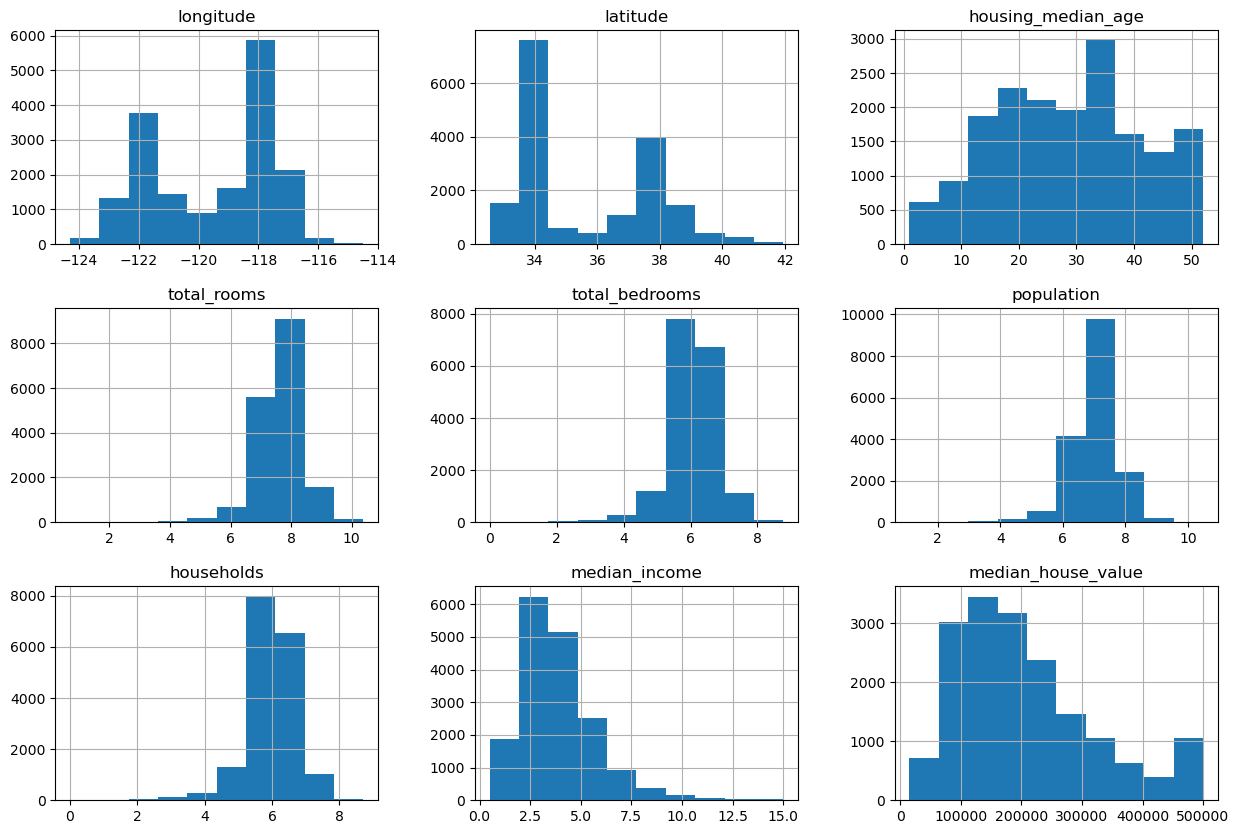

In [33]:
training_data.hist(figsize = (15,10))

### Visualize effect of ocean proximity on house prices - median house value can be higher when you are closer to the coast 

/Users/ufarooqui/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ufarooqui/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ufarooqui/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='latitude', ylabel='longitude'>

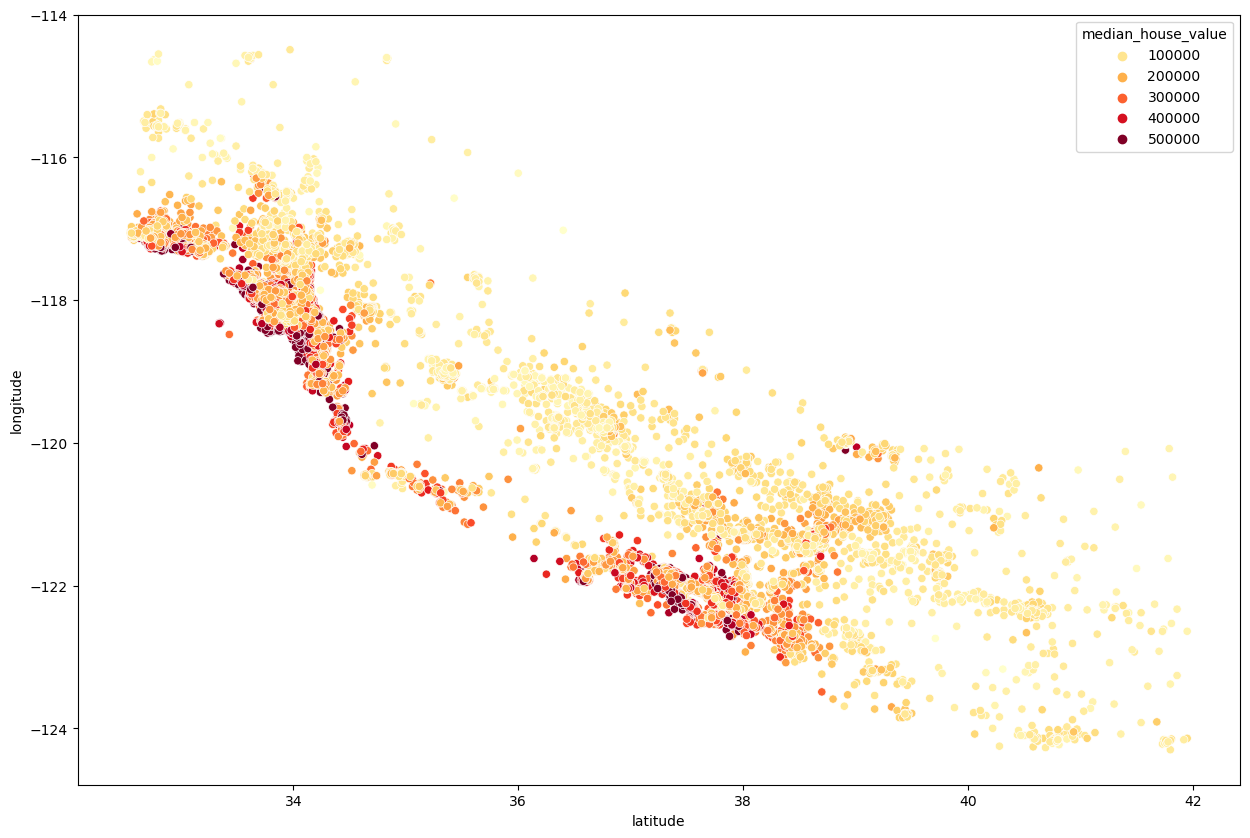

In [34]:
plt.figure(figsize = (15,10))
sea.scatterplot(x = 'latitude', y = 'longitude', data = training_data, hue = 'median_house_value', palette = 'YlOrRd')

### Utilize one-hot encoding for ocean_proximity feature since it may have an impact on median_house_value

In [35]:
training_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7701
INLAND        5494
NEAR OCEAN    2241
NEAR BAY      1928
ISLAND           4
Name: count, dtype: int64

In [36]:
training_data = training_data.join(pd.get_dummies(training_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'], axis = 1)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19183,-122.59,38.44,14.0,7.417580,5.966147,6.224558,5.852202,3.1830,201200.0,1,0,0,0,0
9496,-123.70,39.32,18.0,7.409742,5.863631,6.566672,5.676754,3.1071,213200.0,1,0,0,0,0
14301,-117.14,32.72,43.0,6.978214,5.840642,6.492240,5.631212,2.0529,168800.0,0,0,0,0,1
2222,-119.83,36.82,14.0,6.991177,5.105945,5.899897,5.170484,7.2909,155600.0,0,1,0,0,0
17253,-119.71,34.42,49.0,7.352441,6.077642,6.947937,6.018593,2.9250,246900.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,-117.95,33.99,25.0,6.980076,4.927254,6.111467,4.882802,6.8492,332200.0,1,0,0,0,0
13519,-117.35,34.20,5.0,9.134431,7.380879,8.500250,7.325808,4.4367,133200.0,0,1,0,0,0
5580,-118.30,33.83,33.0,7.906915,6.492240,7.499423,6.493754,3.5473,226300.0,1,0,0,0,0
340,-122.18,37.75,46.0,6.846943,5.384495,6.431331,5.273000,1.3250,87100.0,0,0,0,1,0


### Generate new heatmap with one-hot encoding of ocean_proximity

<Axes: >

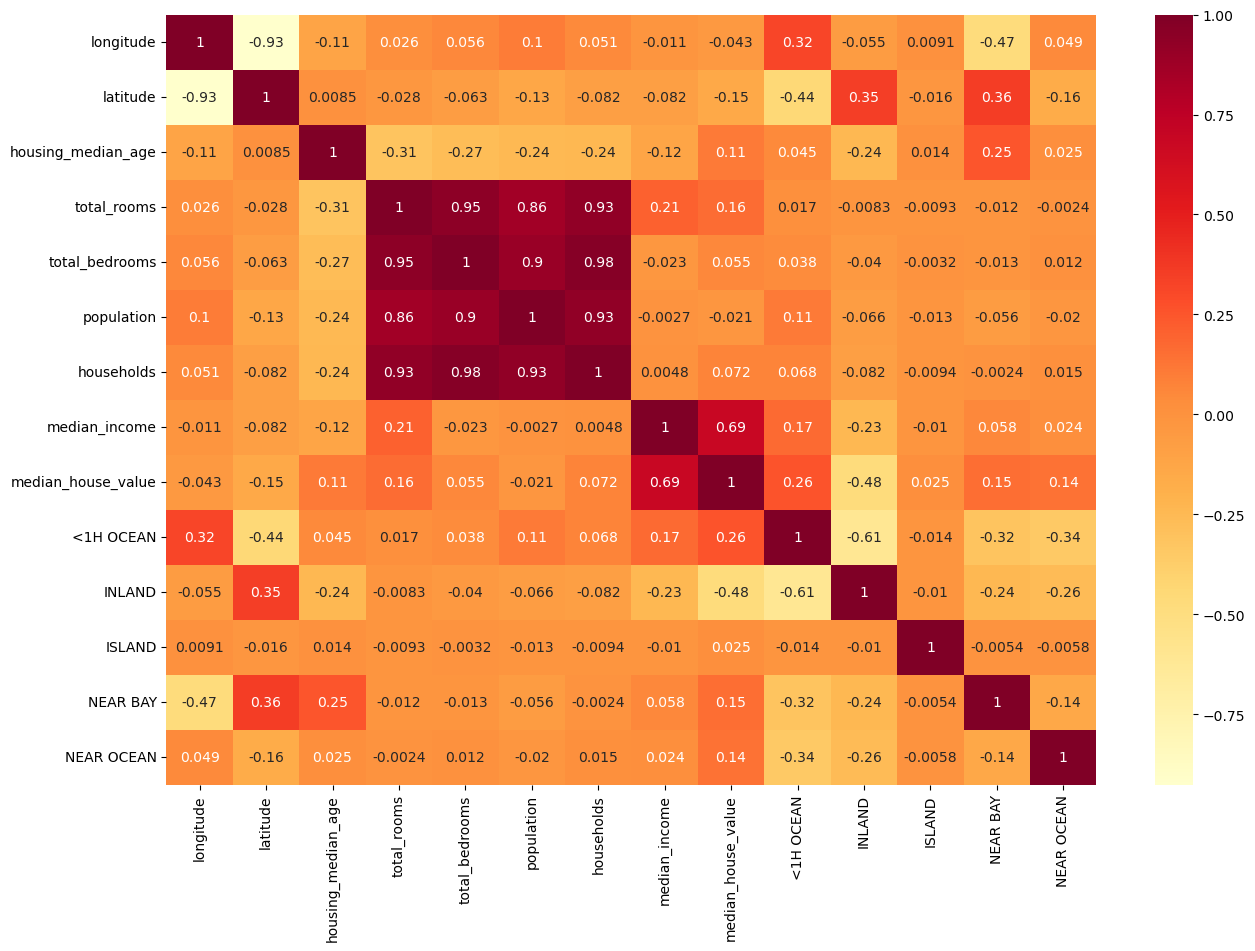

In [37]:
plt.figure(figsize = (15,10))
sea.heatmap(training_data.corr(), annot = True, cmap = "YlOrRd")

## Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression

x_train, y_train = training_data.drop(['median_house_value'], axis = 1), training_data['median_house_value']
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

### Modify the test data accordingly

In [39]:
testing_data = x_test.join(y_test)
testing_data['total_rooms'] = np.log(testing_data['total_rooms'] + log_epsilon)
testing_data['total_bedrooms'] = np.log(testing_data['total_bedrooms'] + log_epsilon)
testing_data['population'] = np.log(testing_data['population'] + log_epsilon)
testing_data['households'] = np.log(testing_data['households'] + log_epsilon)
testing_data = testing_data.join(pd.get_dummies(testing_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'], axis = 1)
x_test, y_test = testing_data.drop(['median_house_value'], axis = 1), testing_data['median_house_value']

### Linear Model Metrics

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

median_house_value_prediction = linear_regression.predict(x_test)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, median_house_value_prediction))
regression_score = r2_score(y_test, median_house_value_prediction)
data_points = np.arange(1, np.array(x_test).shape[0] + 1)
print("Root Mean Squared Error: ", root_mean_squared_error)
print("Coefficient of Determination Regression Score: ", regression_score)


Root Mean Squared Error:  65413.56530065394
Coefficient of Determination Regression Score:  0.6763974324890228


### Ridge Regression To Address Multicollinearity

In [ ]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge(alpha = 1)
ridge_regression.fit(x_train, y_train)

Ridge(alpha=1)

### Ridge Regression Model Metrics

In [77]:
y_prediction = ridge_regression.predict(x_test)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_prediction))
regression_score = ridge_regression.score(x_test, y_test)
print("Root Mean Squared Error: ", root_mean_squared_error)
print("Coefficient of Determination Regression Score: ", regression_score)

Root Mean Squared Error:  65397.33407320599
Coefficient of Determination Regression Score:  0.6765580051530617


## Random Forest Model

### With Default Hyperparameters

In [82]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train, y_train)
y_prediction = forest.predict(x_test)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_prediction))
print("Root Mean Squared Error: ", root_mean_squared_error)
print("Coefficient of Determination Regression Score: ", forest.score(x_test, y_test))

Root Mean Squared Error:  49176.32016397244
Coefficient of Determination Regression Score:  0.8171106683601974


### Cross Validation For Random Forest Hyperparameters

In [85]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
parameter_grid = {"n_estimators": [100, 200, 300], "min_samples_split": [6, 8, 10], "max_depth": [None, 2, 4, 6]}
forest_cv = GridSearchCV(forest, parameter_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)
forest_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6],
                         'min_samples_split': [6, 8, 10],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [86]:
forest_cv.best_estimator_

RandomForestRegressor(min_samples_split=6, n_estimators=200)

In [87]:
y_prediction = forest_cv.best_estimator_.predict(x_test)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_prediction))
print("Root Mean Squared Error: ", root_mean_squared_error)
print("Coefficient of Determination Regression Score: ", forest_cv.best_estimator_.score(x_test, y_test))

Root Mean Squared Error:  48867.956015726246
Coefficient of Determination Regression Score:  0.8193971222187737


## Gradient Boosting Model

### With Default Hyperparameters

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(x_train, y_train)
y_prediction = gradient_boosting.predict(x_test)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_prediction))
print("Root Mean Squared Error: ", root_mean_squared_error)
print("Coefficient of Determination Regression Score: ", gradient_boosting.score(x_test, y_test))

Root Mean Squared Error:  55267.6689401501
Coefficient of Determination Regression Score:  0.7689964721123143


### Cross Validation For Gradient Boosting Hyperparameters

In [88]:
gradient_boosting = GradientBoostingRegressor()
parameter_grid = {"n_estimators": [100, 200, 300], "min_samples_split": [2, 4, 8, 10], "max_depth": [None, 2, 4, 6]}
gradient_boosting_cv = GridSearchCV(gradient_boosting, parameter_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)
gradient_boosting_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6],
                         'min_samples_split': [2, 4, 8, 10],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [89]:
gradient_boosting_cv.best_estimator_

GradientBoostingRegressor(max_depth=6, min_samples_split=8, n_estimators=300)

In [90]:
y_prediction = gradient_boosting_cv.best_estimator_.predict(x_test)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_prediction))
print("Root Mean Squared Error: ", root_mean_squared_error)
print("Coefficient of Determination Regression Score: ", gradient_boosting_cv.best_estimator_.score(x_test, y_test))

Root Mean Squared Error:  46889.00411541453
Coefficient of Determination Regression Score:  0.8337283007661284
